In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [6]:
full = cv2.imread('imgs/puppy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

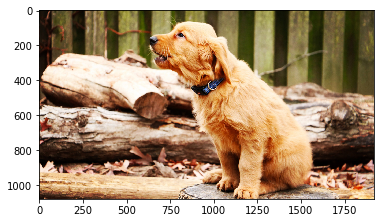

In [7]:
plt.imshow(full)

In [17]:
face = full[0:500,400:1250]

In [18]:
face.shape

(500, 850, 3)

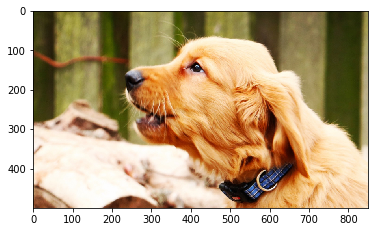

In [20]:
plt.imshow(face)

In [21]:
# All the 6 methods for comparison in a list
# Note how we are using strings,later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

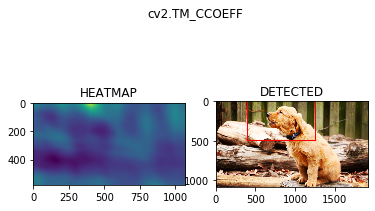

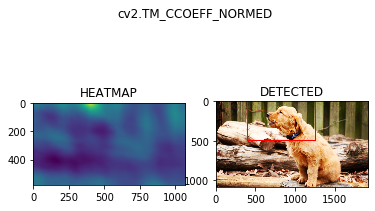

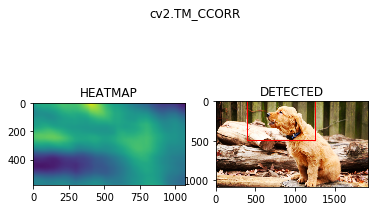

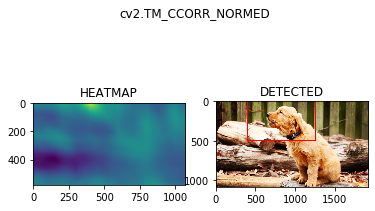

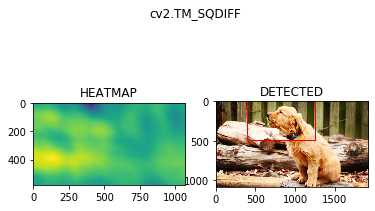

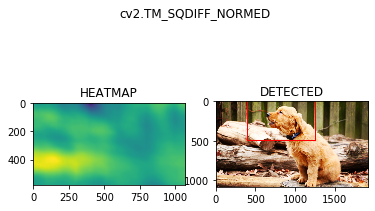

In [32]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        
    else:
        top_left = max_loc
        
    height,width,channel = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP")
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTED")
    plt.suptitle(m)
    
    plt.show()